In [71]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torchshow as ts
import torchmetrics
import matplotlib.pyplot as plt

In [72]:
# Importere dataset, kun træning indtil videre.
training_images = MNIST(root='data', transform=ToTensor(), train=True)
training_dataloader = DataLoader(training_images, batch_size=1000)
testing_images = MNIST(root='data', transform=ToTensor(), train=False)
testing_dataloader = DataLoader(testing_images, batch_size=1000)

In [73]:
# Laver det Neurale Netværk, og opstiller et accuracy objekt til at måle hvor god modellen er.
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
net = nn.Sequential(
    nn.Conv2d(1, 10, kernel_size=3), #første parameter 1 er antal kanaler, her 1 fordi vi arbejder med gråtoner; 12 er antal ouputkanaler, altså antal filtre; 3 er størrelsen på det udsnit af billedet vi tager, som så bliver 3x3 matrice af pixels.
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2), #vælger den maksimale værdi i et udsnit af størrelsen 2x2, således dimensionerne af dataene reduceres fra 28x28 til 14x14
    nn.Conv2d(10, 10, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2), #vælger den maksimale værdi i et udsnit af størrelsen 2x2, således dimensionerne af dataene reduceres fra 14x14 til 7x7
    nn.Flatten(),
    nn.Linear(250,10), # input er nu 5 x 5 x 10
)
# Bruger crossentropy til at udregne losset, og indstiller optimizeren.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01, maximize=False)

In [74]:
# Loop'er over 10 epoker, og udregner loss'et og accuracy for hvert.
def training_loop(training_dataloader, optimizer, loss_fn):
    total_loss = 0
    accuracy.reset()
    size = len(training_dataloader)
    for images,labels in training_dataloader:
        optimizer.zero_grad()
        output = net(images)
        loss = loss_fn(output, labels)
        total_loss += loss
        loss.backward()
        optimizer.step()
        accuracy.update(output, labels)
    avg_loss = total_loss / size
    print(f"Avg Training Accuracy: {accuracy.compute() * 100:.2f}%")
    print(f"Avg Training Loss: {avg_loss}")

def testing_loop(testing_dataloader, loss_fn):
    total_loss = 0
    accuracy.reset()
    size = len(testing_dataloader)
    with torch.no_grad():
        for images,labels in testing_dataloader:
            output = net(images)
            loss = loss_fn(output, labels)
            total_loss += loss
            accuracy.update(output,labels)
    avg_loss = total_loss / size
    print(f"Avg Testing Accuracy: {accuracy.compute() * 100 :.2f}%")
    print(f"Avg Testing Loss: {avg_loss}")

In [75]:
for i in range(10):
    print(f"Epoch: {i}")
    testing_loop(testing_dataloader, loss_fn)
    training_loop(training_dataloader, optimizer, loss_fn)
    print("------------------")

Epoch: 0
Avg Testing Accuracy: 6.63%
Avg Testing Loss: 2.306647777557373
Avg Training Accuracy: 84.10%
Avg Training Loss: 0.5524539351463318
------------------
Epoch: 1
Avg Testing Accuracy: 95.45%
Avg Testing Loss: 0.15634384751319885
Avg Training Accuracy: 95.89%
Avg Training Loss: 0.13817347586154938
------------------
Epoch: 2
Avg Testing Accuracy: 97.16%
Avg Testing Loss: 0.09445755928754807
Avg Training Accuracy: 96.98%
Avg Training Loss: 0.09819365292787552
------------------
Epoch: 3
Avg Testing Accuracy: 97.70%
Avg Testing Loss: 0.07518746703863144
Avg Training Accuracy: 97.60%
Avg Training Loss: 0.07870824635028839
------------------
Epoch: 4
Avg Testing Accuracy: 97.85%
Avg Testing Loss: 0.06654796749353409
Avg Training Accuracy: 97.95%
Avg Training Loss: 0.06838203221559525
------------------
Epoch: 5
Avg Testing Accuracy: 98.06%
Avg Testing Loss: 0.06257737427949905
Avg Training Accuracy: 98.09%
Avg Training Loss: 0.06178075075149536
------------------
Epoch: 6
Avg Testing

Model output:
tensor([[ -4.7197,   3.3315,  -6.1920,  11.8447,  -2.9824,  -0.0817, -20.6869,
          -5.9417,  -5.9319,   3.6082]], grad_fn=<AddmmBackward0>)
Efter softmax:
tensor([[6.3972e-08, 2.0072e-04, 1.4674e-08, 9.9953e-01, 3.6349e-07, 6.6108e-06,
         7.4389e-15, 1.8849e-08, 1.9034e-08, 2.6469e-04]],
       grad_fn=<SoftmaxBackward0>)
Modul bud: 3



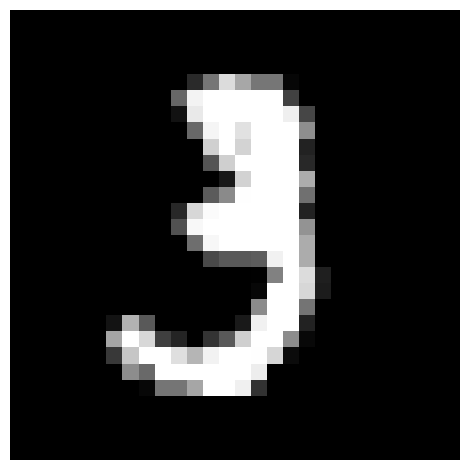

In [81]:
# Afprøver modellen på et givent index af billederne.
img_idx = 10
pred = net(training_images[img_idx][0].unsqueeze(0)) 
print("Model output:")
print(pred)
sm = nn.Softmax(dim=1)
print("Efter softmax:")
print(sm(pred))
print(f"Modul bud: {pred.argmax()}")
print()
ts.show(training_images[img_idx][0])